<a href="https://colab.research.google.com/github/bartiralira/plataforma_cognitiva/blob/main/Plataformas_Azure_Face_Detecta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
!git clone https://github.com/elthonf/azure-ml.git

Cloning into 'azure-ml'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 105 (delta 41), reused 83 (delta 24), pack-reused 0
Receiving objects: 100% (105/105), 6.01 MiB | 17.69 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [2]:
!pip install azure-cognitiveservices-vision-face
!pip install Pillow

     |████████████████████████████████| 66 kB 2.3 MB/s 
     |████████████████████████████████| 85 kB 1.7 MB/s 
     |████████████████████████████████| 45 kB 2.2 MB/s 


In [3]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from PIL import Image, ImageDraw
import json


In [4]:
def getRectangle(faceDictionary):
    """
    Função para criar um retângulo a partir de uma face identificada pelo Azure Face Detection
    :param faceDictionary:
    :return:
    """
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height

    return ((left, top), (right, bottom))

In [5]:
def drawCrossesOnFace(faceLandmarks, size=2, color='white'):
    fl = faceLandmarks.as_dict()
    for l in fl.keys():
        x = fl[l]['x']
        y = fl[l]['y']
        draw.line(((x - size, y - size), (x + size, y + size)), fill=color)
        draw.line(((x - size, y + size), (x + size, y - size)), fill=color)
    pass

# Cliente de API

In [6]:
KEY = "bf09e187698d47bbb8b36457dd35346e" #Coloque aqui sua chave
ENDPOINT = "https://facialexperimento.cognitiveservices.azure.com/" #Coloque aqui seu endpoint (Ponto de Extremidade)
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

Experimente  mudar o arquivo abaixo

In [21]:
imagefile = "./azure-ml/datasets/facial/face_varias.jpg"
with open(imagefile, 'r+b') as w:
    detected_faces = face_client.face.detect_with_stream(image=w)

# Simples

In [22]:
img = Image.open(imagefile)
draw = ImageDraw.Draw(img)
for face in detected_faces:
    print("**** Detected face id [{0}] on : {1}".format(face.face_id, face.face_rectangle))
    draw.rectangle(getRectangle(face), outline='red')

**** Detected face id [fccfc1e0-adf6-4e2f-bfad-d19270605e1e] on : {'additional_properties': {}, 'width': 78, 'height': 78, 'left': 365, 'top': 192}
**** Detected face id [d53ca45f-506c-4904-870b-654536160761] on : {'additional_properties': {}, 'width': 78, 'height': 78, 'left': 264, 'top': 162}
**** Detected face id [e36bb32d-afa9-4673-9c5c-8aec274a5dd5] on : {'additional_properties': {}, 'width': 76, 'height': 76, 'left': 108, 'top': 185}
**** Detected face id [4142ff0b-4752-434c-a63e-6f6951daae1c] on : {'additional_properties': {}, 'width': 76, 'height': 76, 'left': 468, 'top': 80}
**** Detected face id [dbb52cd6-70ac-4a03-987a-f47c995425be] on : {'additional_properties': {}, 'width': 75, 'height': 75, 'left': 439, 'top': 184}
**** Detected face id [3026630f-61f1-4097-9f33-c80b8739d897] on : {'additional_properties': {}, 'width': 74, 'height': 74, 'left': 18, 'top': 104}
**** Detected face id [b21468da-87b8-4a30-8ed3-9ddd9eb642d1] on : {'additional_properties': {}, 'width': 71, 'heig

Exibe a imagem

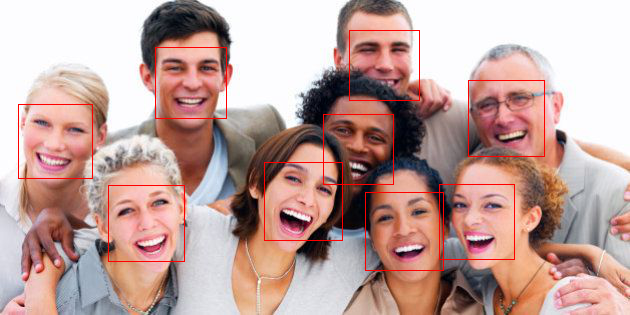

In [23]:
img

# Full

In [24]:
return_face_attributes = ["age", "gender", "headPose", "smile", "hair", "accessories", "facialHair", "glasses", "emotion",  "noise", "occlusion", "blur", "makeup"]
with open(imagefile, 'r+b') as w:
    detected_faces = face_client.face.detect_with_stream(image=w, return_face_landmarks = True, return_face_attributes = return_face_attributes)

In [ ]:
img = Image.open(imagefile)
draw = ImageDraw.Draw(img)
for face in detected_faces:
    print("**** Detected face id [{0}] on : {1}".format(face.face_id, face.face_rectangle))
    print("Landmarks: ")
    print(json.dumps(face.face_landmarks.as_dict(), indent=4) )
    print("Atributes: ")
    print(json.dumps(face.face_attributes.as_dict( ), indent=4) )
    draw.rectangle(getRectangle(face), outline='red')
    drawCrossesOnFace(face.face_landmarks, size=2, color='white')

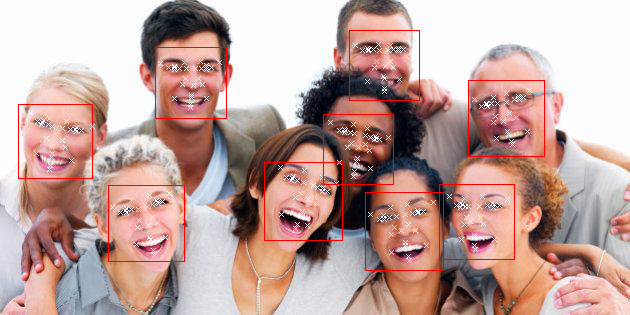

In [26]:
img